In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import os

In [3]:
os.listdir()  

['.ipynb_checkpoints', 'movies.csv', 'przemysl-filmowy.ipynb', 'README.md']

In [4]:
plik = 'movies.csv'
data = pd.read_csv(plik, encoding='cp1252')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [5]:
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


# Braki danych

In [6]:
braki_danych = pd.concat([data.isnull().sum()], axis = 1, keys = ["Brakujące dane:"])
print(braki_danych)

          Brakujące dane:
budget                  0
company                 0
country                 0
director                0
genre                   0
gross                   0
name                    0
rating                  0
released                0
runtime                 0
score                   0
star                    0
votes                   0
writer                  0
year                    0


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,6820.0,2.458113e+07,3.702254e+07,0.0,0.00,11000000.0,32000000.00,300000000.0
gross,6820.0,3.349783e+07,5.819760e+07,70.0,1515839.00,12135679.0,40065340.50,936662225.0
runtime,6820.0,1.065513e+02,1.802818e+01,50.0,95.00,102.0,115.00,366.0
score,6820.0,6.374897e+00,1.003142e+00,1.5,5.80,6.4,7.10,9.3
votes,6820.0,7.121952e+04,1.305176e+05,27.0,7665.25,25892.5,75812.25,1861666.0
year,6820.0,2.001000e+03,8.944501e+00,1986.0,1993.00,2001.0,2009.00,2016.0


In [8]:
for i in ['budget', 'gross', 'runtime', 'score', 'votes', 'year']:
    print(i, 'min =', data[i].min(), '&', i, 'max =', data[i].max())

budget min = 0.0 & budget max = 300000000.0
gross min = 70.0 & gross max = 936662225.0
runtime min = 50 & runtime max = 366
score min = 1.5 & score max = 9.3
votes min = 27 & votes max = 1861666
year min = 1986 & year max = 2016


In [9]:
len(data[data['budget']==0])

2182

W danym zbiorze danych nie ma braków. Braki danych w "budget" zostały zastąpione zerami. 

# Zmienna company

In [10]:
data["company"].value_counts().head(10)

Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
Columbia Pictures Corporation             166
Touchstone Pictures                       131
Columbia Pictures                         108
Walt Disney Pictures                      102
Metro-Goldwyn-Mayer (MGM)                 101
Name: company, dtype: int64

# Zmienna genre

<AxesSubplot:>

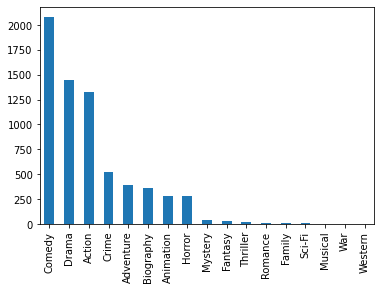

In [11]:
data["genre"].value_counts().plot(kind='bar')

# Zmienna country

In [12]:
data["country"].value_counts()

USA                               4872
UK                                 698
France                             283
Canada                             150
Germany                            134
Australia                           82
Japan                               68
Spain                               56
Italy                               51
Ireland                             44
Hong Kong                           39
India                               39
Denmark                             33
China                               24
South Korea                         20
Sweden                              18
Belgium                             18
New Zealand                         18
Mexico                              15
Argentina                           13
Netherlands                         12
Iran                                12
Russia                              10
South Africa                         9
Czech Republic                       8
Taiwan                   

In [13]:
data["country"] = pd.DataFrame(data["country"].replace(
{'West Germany':'Germany', 'Hong Kong' : 'China', 'Soviet Union':'Russia'}))

5 krajów z największą ilością filmów w danym zbiorze

In [14]:
country1, country2, country3, country4, country5 = data[data.country == "USA"], data[data.country == "UK"], data[data.country == "France"], data[data.country == "Canada"],data[data.country == "Germany"]

Stany Zjednoczone    4872
Wielka Brytania       698
Francja               283
Kanada                150
Niemcy                138
Name: 5 krajów z największą ilością filmów, dtype: int64

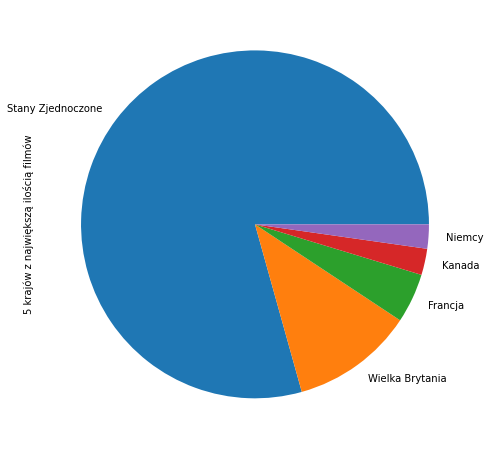

In [15]:
wykres_kolowy = pd.Series([len(country1), len(country2), len(country3), len(country4), len(country5)], name = "5 krajów z największą ilością filmów", index = ["Stany Zjednoczone","Wielka Brytania","Francja","Kanada", "Niemcy"])

wykres_kolowy.plot.pie(figsize=(12, 8))
wykres_kolowy

In [16]:
#Podzielone na kontynenty

data["continents"]= pd.DataFrame(data["country"].replace(
{"Japan":"Asia", "China":"Asia", "India":"Asia", "South Korea":"Asia", "Taiwan":"Asia","Thailand":"Asia","Indonesia":"Asia",
"Saudi Arabia":"Asia", "Palestine":"Asia",  "Iran":"Asia", "Israel":"Asia",
"UK":"Europe", "France":"Europe", "Germany":"Europe", "Spain":"Europe", "Italy":"Europe", "Ireland":"Europe", "Denmark":"Europe",
 "Belgium":"Europe", "Sweden":"Europe", "Netherlands":"Europe", "Czech Republic":"Europe", "Norway":"Europe", "Hungary":"Europe", 
 "Austria":"Europe", "Switzerland":"Europe", "Greece":"Europe", "Romania":"Europe", "Finland":"Europe",
 "Portugal":"Europe", "Poland":"Europe", "Ukraine":"Europe", "Republic of Macedonia":"Europe", "Iceland":"Europe", "Malta":"Europe",
 "Federal Republic of Yugoslavia":"Europe",
 "USA":"North America", "Canada":"North America", "Mexico":"North America", "Panama":"North America", "Jamaica":"North America",
 "Cuba":"North America", "Bahamas":"North America",
 "Aruba":"South America", "Peru":"South America", "Colombia":"South America", "Chile":"South America", "Brazil": "South America",
 "Argentina":"South America",
 "New Zealand":"Australia",
 "Kenya":"Africa", "South Africa":"Africa",
 "Russia":"Eurasia"}
))


data["continents"].value_counts()

North America    5041
Europe           1408
Asia              222
Australia         100
South America      28
Eurasia            11
Africa             10
Name: continents, dtype: int64

# Hipoteza 1: Dramaty są oceniane lepiej niż horrory. 

In [86]:
data[(data.genre == "Drama") | (data.genre == "Horror")]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,continents
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,Europe
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986,North America
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986,North America
15,17000000.0,Producers Sales Organization (PSO),USA,Adrian Lyne,Drama,6734844.0,9½ Weeks,R,1986-02-21,117,5.9,Mickey Rourke,31798,Elizabeth McNeill,1986,North America
32,0.0,Gaumont,France,Jean-Jacques Beineix,Drama,2003822.0,Betty Blue,Not specified,1986-11-07,120,7.4,Jean-Hugues Anglade,14562,Philippe Djian,1986,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,4000000.0,Blumhouse Productions,USA,Greg McLean,Horror,10732841.0,The Darkness,PG-13,2016-05-13,92,4.4,Kevin Bacon,9450,Greg McLean,2016,North America
6812,0.0,Killer Films,USA,Andrew Neel,Drama,23020.0,Goat,R,2016-09-23,96,5.7,Ben Schnetzer,4439,David Gordon Green,2016,North America
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,North America
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,North America


In [87]:
data.groupby("genre")["score"].mean()

genre
Action       6.106086
Adventure    6.354847
Animation    6.746931
Biography    7.040390
Comedy       6.165769
Crime        6.756322
Drama        6.715720
Family       5.792857
Fantasy      5.775000
Horror       5.687004
Musical      6.650000
Mystery      6.342105
Romance      6.126667
Sci-Fi       6.253846
Thriller     5.877778
War          6.400000
Western      6.200000
Name: score, dtype: float64

In [88]:
data[(data.genre == "Drama") | (data.genre == "Horror")].groupby([data.genre])["score"].mean()

genre
Drama     6.715720
Horror    5.687004
Name: score, dtype: float64

# Hipoteza 2: Średni dochód z filmów z Ameryki Północnej jest większy niż średni dochód z filmów z Europy. 

In [102]:
data[(data.continents == "North America") | (data.continents == "Europe")]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,continents
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,North America
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,North America
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,North America
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,North America
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,Europe
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,North America
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,North America
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,North America


In [104]:
data[(data.continents == "North America") | (data.continents == "Europe")].groupby([data.continents])["gross"].mean()

continents
Europe           1.554956e+07
North America    3.974920e+07
Name: gross, dtype: float64

# Hipoteza 3: Filmy akcji są dłuższe od animacji. 

In [90]:
data[(data.genre == "Action") | (data.genre == "Animation")]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,continents
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,North America
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,North America
11,16000000.0,Thorn EMI Screen Entertainment,UK,Russell Mulcahy,Action,5900000.0,Highlander,R,1986-03-07,116,7.2,Christopher Lambert,104860,Gregory Widen,1986,Europe
13,25000000.0,Twentieth Century Fox Film Corporation,USA,John Carpenter,Action,11100000.0,Big Trouble in Little China,PG-13,1986-07-02,99,7.3,Kurt Russell,101678,Gary Goldman,1986,North America
16,10000000.0,De Laurentiis Entertainment Group (DEG),USA,Stephen King,Action,7433663.0,Maximum Overdrive,R,1986-07-25,98,5.4,Emilio Estevez,24881,Stephen King,1986,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6798,20000000.0,StudioCanal,UK,James Watkins,Action,39000.0,The Take,R,2016-11-18,92,6.3,Idris Elba,23717,Andrew Baldwin,2016,Europe
6804,0.0,Digic Pictures,Japan,Takeshi Nozue,Animation,233569.0,Kingsglaive: Final Fantasy XV,PG-13,2016-07-09,110,6.9,Aaron Paul,15705,Takashi Hasegawa,2016,Asia
6811,8500000.0,CBS Films,USA,Steve Carr,Animation,19985196.0,Middle School: The Worst Years of My Life,PG,2016-10-07,92,6.1,Griffin Gluck,4556,Chris Bowman,2016,North America
6814,20000000.0,LD Entertainment,USA,Kevin Reynolds,Action,36874745.0,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,2016,North America


In [91]:
data[(data.genre == "Action") | (data.genre == "Animation")].groupby([data.genre])["runtime"].mean()

genre
Action       109.000751
Animation     92.393502
Name: runtime, dtype: float64

# Hipoteza 4: Większość animacji powstała w Japoni 